In [0]:
from sklearn import tree
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Obtendo a base de dados**

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data -O credit_approval.csv

--2019-11-21 00:32:54--  http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘credit_approval.csv’

credit_approval.csv 100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-11-21 00:32:54 (1.08 MB/s) - ‘credit_approval.csv’ saved [32218/32218]



### **Lendo a base de dados**

In [0]:
columns = ['gender', 'age', 'debt', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'citizen', 'zipcode', 'income', 'class']

In [0]:
df = pd.read_csv('credit_approval.csv', names=columns)

In [14]:
df.head()

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### **Fazendo algum preprocessamento**

In [0]:
df.replace('?',np.NaN, inplace=True)

In [0]:
df.dropna(inplace=True)

### **Sumetendo a um modelo de árvore de decisão**

In [0]:
categorical_data_columns = ['gender', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'priordefault', 'employed', 'driverslicense', 'citizen']
target_columns = ['class']

In [0]:
# Usando one-hot encoding para representar numericamente os dados categóricos
one_hot_data = pd.get_dummies(data=df, columns=categorical_data_columns)
one_hot_data.drop(columns=['zipcode'], inplace=True)

In [0]:
y = df[target_columns]
one_hot_data.drop(columns=['class'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(one_hot_data, y, test_size=0.33, random_state=42)

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=20)
clf = clf.fit(X_train, y_train)

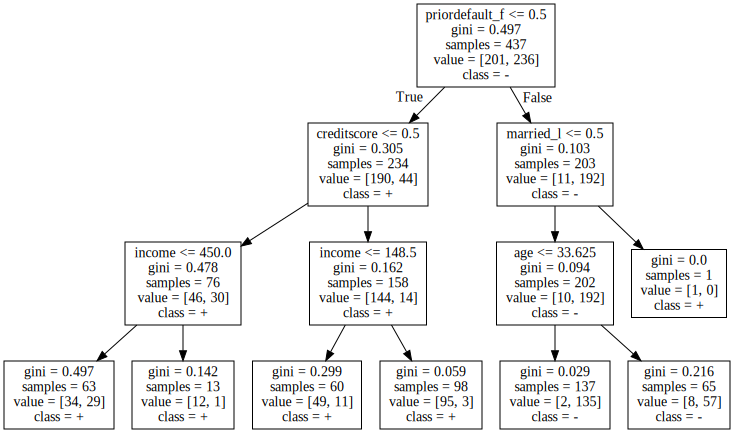

In [40]:
dot_data = tree.export_graphviz(clf, feature_names=one_hot_data.columns, class_names=['+', '-'], precision=3,  label='all')  
graph = graphviz.Source(dot_data)  
graph 

### **Validando nosso primeiro modelo**

In [0]:
y_predicted = clf.predict(X_test)
y_true = y_test['class'].tolist()

In [36]:
accuracy_score(y_true, y_predicted)

0.8333333333333334

## **Pronto, agora você usou todo o potencial do seu dado, certo? Já podemos usar este modelo pra decidir quem terá o crédito aprovado?** 


![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRICXwIg0myd8fYSnLHCXfaYqx_Ynp0YlBaVHdtIil682BCrYoZkA&s)

## **O que você faria pra melhorar essa acurácia?**